In [6]:
pip install -U ppscore

In [7]:
#εισαγωγή βιβλιοθηκών - πακέτνω
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns

In [8]:
#Διμιουργία data
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

In [9]:
#Υπολογισε το PPS matrix μεταξή των στηλών
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.246903,0.330653,DecisionTreeRegressor()
2,x,y,0.669531,regression,True,mean absolute error,1.000631,0.330678,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.987266,1.338062,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.000631,1.326133,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.987266,1.092502,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.246903,0.278271,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


<Axes: xlabel='x', ylabel='y'>

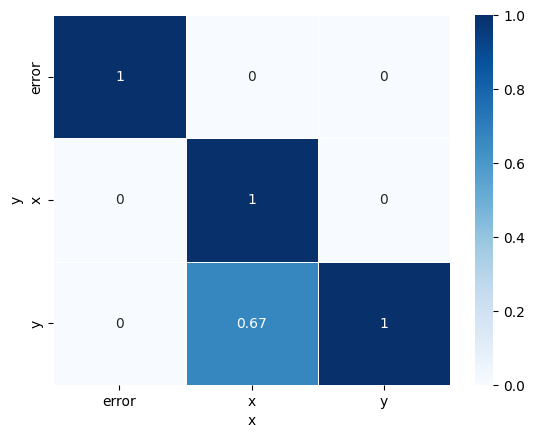

In [10]:
#Plotting the PPS matrix
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)